# Regresión Logística
### Diego Quan

In [219]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [246]:
#importación de los datos
data = pd.read_csv('heart.csv')

Se eligieron las variables **age, trestbps, chol, thalach, oldpeak, slope y thal** para realizar esta regresión logística.

In [247]:
'''Se separan los features de los labels, se estandariza la data a través de la librería de StandardScaler de sklearn
y finalmente se separa la data en data de entrenamiento y data de testing'''
X = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'thal']]
Y = data['target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 100)

In [221]:
class LogisticRegression:
    '''Constructor de la regresión logística'''

    def __init__(self, learning_rate=0.001, n_iters=1000):
        '''Inicialización de los parametros
        '''
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def cost_function(self, x, y, theta):
        '''Función de costo de la regresión logística
        x: features del dataset
        y: labels del dataset
        theta: los pesos de la hipotésis'''
        m = len(y)
        return (-y * np.log(theta) - (1 - y) * np.log(1 - theta)) / m

    def fit(self, X, y):
        '''Proceso e iteraciones del descenso al gradiente. En esta función es donde se llevan a cabo la mayoría de operaciones
        X: features del dataset
        y: labels del dataset'''
        n_samples, n_features = X.shape

        # inicialización de parametros
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.cost_history = []

        # descenso al gradiente
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            # applicar la función de sigmoide
            y_predicted = self._sigmoid(linear_model)

            # actualizar parametros
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            #actualizar el historial de costo
            cost = self.cost_function(X, y, y_predicted)
            
            self.cost_history.append(cost.iloc[-1])
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        '''Se realizan la predicción por cada una de las observaciones
        X: features del dataset'''
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [211]:
def accuracy(y_true, y_pred):
    '''Obtener la precisión del dataset
    y_true: los labels del dataset a predecir
    y_pred: las predicciones obtenidas a través del modelo'''
    return np.sum(y_true == y_pred) / len(y_true)

### Parametros selectos
Los parametros elegidos son learning rate de 0.003 y número de iteraciones de 3250, debido a que el costo comienza a escalar de nuevo después de cierta cantidad de iteraciones

In [240]:
#inicialización del modelo
regressor = LogisticRegression(learning_rate = 0.003, n_iters = 3250)
#ajustar la data al modelo
regressor.fit(X_train, Y_train)
#crear las predicciones del modelo
predictions = regressor.predict(X_test)

La precisión final del módelo fue de 76%, que en este caso es una buena precisión.

In [241]:
#la precisión del modelo
print("LR accuracy: ", accuracy(Y_test, predictions))

LR accuracy:  0.76


Text(0, 0.5, 'Training Cost')

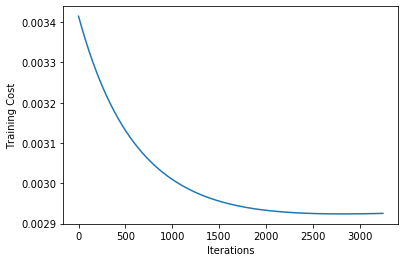

In [245]:
plt.plot(regressor.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Training Cost')